In [19]:
import numpy as np
import matplotlib.pyplot as plt

(100.0, 0.0)

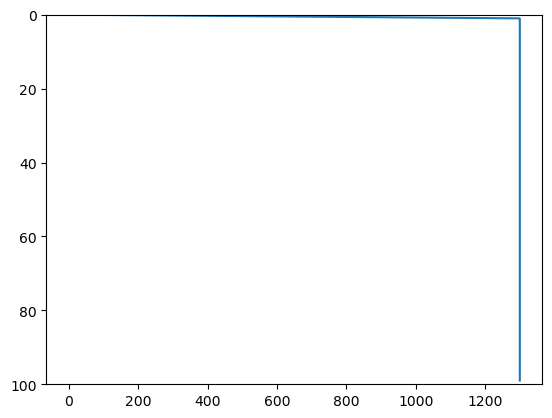

In [20]:
dz = 1e3

z = np.arange(0, 100000, dz)

# Temperatura incicial sob a dorsal meso-oceânica
T1 = 1300 # Temperatura base da litosfera
T0 = 0 # temperatura do topo da placa oceânica

T = np.zeros_like(z) + T1

T[0] = T0
plt.plot(T,z/1000)
plt.ylim(100,0)

(100.0, 0.0)

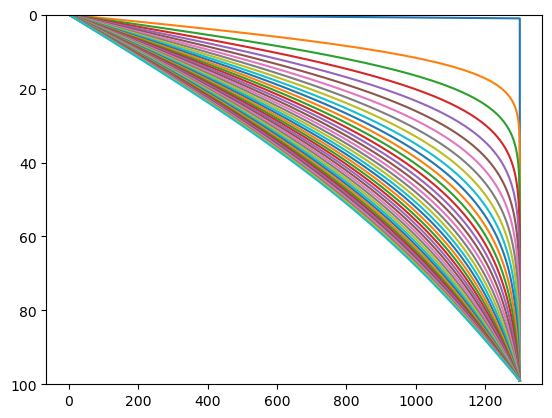

In [21]:
kappa = 1e-6 #m²/s - difusividade térmica da litosfera

t = 0
dt = 1000

sec_per_year = 365.25*24*60*60

fac = dt*sec_per_year*kappa/dz**2
tprint = 0
while t<60e6:
    if t >= tprint:
        plt.plot(T, z/1000)
        tprint += 1.5e6
    T[1:-1] += fac*(T[2:]-2*T[1:-1]+T[:-2])

    t += dt

plt.ylim(100,0)